In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
directory = "/content/drive/MyDrive/drive-download-20240729T142332Z-001"
files = os.listdir(directory)
print(files)


['waffles', 'spaghetti_bolognese', 'spaghetti_carbonara', 'tuna_tartare', 'sushi', 'tiramisu', 'tacos', 'strawberry_shortcake', 'spring_rolls', 'takoyaki', 'steak', 'shrimp_and_grits', 'seaweed_salad', 'ramen', 'risotto', 'pulled_pork_sandwich', 'sashimi', 'prime_rib', 'ravioli', 'red_velvet_cake', 'scallops', 'samosa', 'poutine', 'pork_chop', 'omelette', 'onion_rings', 'oysters', 'paella', 'pho', 'panna_cotta', 'peking_duck', 'pad_thai', 'pancakes', 'pizza', 'nachos', 'mussels', 'macaroni_and_cheese', 'lobster_roll_sandwich', 'macarons', 'lasagna', 'miso_soup', 'huevos_rancheros', 'lobster_bisque', 'hummus', 'ice_cream', 'hot_dog', 'hot_and_sour_soup', 'hamburger', 'garlic_bread', 'frozen_yogurt', 'gyoza', 'guacamole', 'gnocchi', 'fried_rice', 'grilled_cheese_sandwich', 'greek_salad', 'grilled_salmon', 'fried_calamari', 'french_toast', 'edamame', 'filet_mignon', 'escargots', 'french_onion_soup', 'french_fries', 'fish_and_chips', 'eggs_benedict', 'foie_gras', 'falafel', 'dumplings', 'd

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

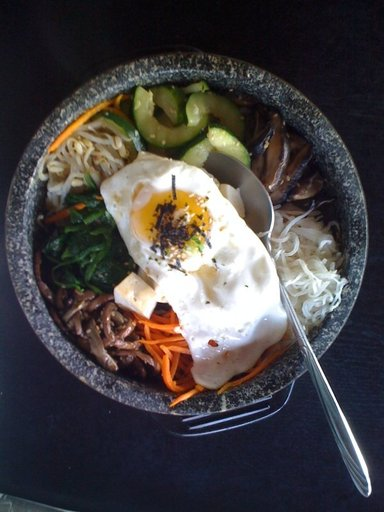

In [5]:
img = cv2.imread('/content/drive/MyDrive/drive-download-20240729T142332Z-001/bibimbap/149817.jpg')
display = cv2_imshow(img)

In [6]:
import tensorflow as tf
train , validation = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/drive-download-20240729T142332Z-001",
                                                                 labels="inferred",
                                                                 label_mode="int",
                                                                 validation_split=0.2,
                                                                 image_size = (224,224),
                                                                 seed=23,
                                                                 color_mode="rgb",
                                                                 subset="both")

Found 11219 files belonging to 101 classes.
Using 8976 files for training.
Using 2243 files for validation.


In [7]:
train = train.map(lambda x, y: (x / 255.0, y))
validation = validation.map(lambda x, y: (x / 255.0, y))


In [8]:
import tensorflow as tf
for image_batch, label_batch in train.take(1):
    print(image_batch.shape)

(32, 224, 224, 3)


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
# import tensorflow_datasets as tfds
model_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
model = tf.keras.Sequential([
    hub.KerasLayer(model_url, input_shape=[224, 224, 3], trainable=False),
    tf.keras.layers.Dense(101, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(
    train,
    validation_data=validation,
    epochs=5
)

Epoch 1/5
281/281 [==============================] - 92s 321ms/step - loss: 0.1466 - accuracy: 0.9954 - val_loss: 2.4854 - val_accuracy: 0.4851
Epoch 2/5
281/281 [==============================] - 46s 161ms/step - loss: 0.1176 - accuracy: 0.9982 - val_loss: 2.5036 - val_accuracy: 0.4900
Epoch 3/5
281/281 [==============================] - 48s 164ms/step - loss: 0.0968 - accuracy: 0.9988 - val_loss: 2.5453 - val_accuracy: 0.4891
Epoch 4/5
281/281 [==============================] - 44s 155ms/step - loss: 0.0786 - accuracy: 0.9996 - val_loss: 2.5900 - val_accuracy: 0.4909
Epoch 5/5
281/281 [==============================] - 47s 164ms/step - loss: 0.0663 - accuracy: 0.9998 - val_loss: 2.6101 - val_accuracy: 0.4935


In [13]:
val_loss, val_accuracy = model.evaluate(validation)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


71/71 [==============================] - 9s 132ms/step - loss: 2.6101 - accuracy: 0.4935
Validation Loss: 2.6100986003875732
Validation Accuracy: 0.49353542923927307


In [14]:
import tensorflow as tf
tf.keras.models.save_model(model, 'food.h5')

<ipython-input-14-6464f306a9b0>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, 'food.h5')


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class
img_path = '/content/drive/MyDrive/drive-download-20240729T142332Z-001/tacos/152327.jpg'
predicted_class = predict_image(img_path)
print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 20ms/step
Predicted class: [96]
